predicted=1403.269293, expected=1211.000000
predicted=1381.436118, expected=1261.000000
predicted=1274.398800, expected=1235.000000
predicted=1324.743619, expected=1361.000000
predicted=1437.900411, expected=1289.000000
predicted=1284.828133, expected=1246.000000
predicted=1254.845208, expected=1244.000000
predicted=1253.567717, expected=1233.000000
predicted=1231.600222, expected=1226.000000
predicted=1248.152221, expected=1234.000000
predicted=1241.534819, expected=1256.000000
predicted=1249.093268, expected=1314.000000
predicted=1290.325667, expected=1235.000000
predicted=1245.617498, expected=1192.000000
predicted=1212.937649, expected=1302.000000
predicted=1274.500582, expected=1423.000000
predicted=1361.942174, expected=1476.000000
predicted=1432.139724, expected=1412.000000
predicted=1397.846463, expected=1293.000000
predicted=1308.344078, expected=1292.000000
predicted=1303.352369, expected=1216.000000
predicted=1258.642564, expected=1350.000000
predicted=1347.476329, expected=

predicted=1591.910602, expected=1501.000000
predicted=1554.765595, expected=1461.000000
predicted=1460.722612, expected=1459.000000
predicted=1465.256292, expected=1580.000000
predicted=1544.813424, expected=1464.000000
predicted=1486.086050, expected=1525.000000
predicted=1523.531423, expected=1775.000000
predicted=1683.213509, expected=1489.000000
predicted=1510.781448, expected=1473.000000
predicted=1524.740552, expected=1465.000000
predicted=1469.822270, expected=1532.000000
predicted=1509.972919, expected=1480.000000
predicted=1525.893508, expected=1436.000000
predicted=1457.302254, expected=1371.000000
predicted=1402.377919, expected=1465.000000
predicted=1451.700484, expected=1230.000000
predicted=1304.055274, expected=1278.000000
predicted=1318.888259, expected=1272.000000
predicted=1290.887074, expected=1312.000000
predicted=1306.449291, expected=1326.000000
predicted=1341.765978, expected=1324.000000
predicted=1310.203141, expected=1511.000000
predicted=1446.470339, expected=

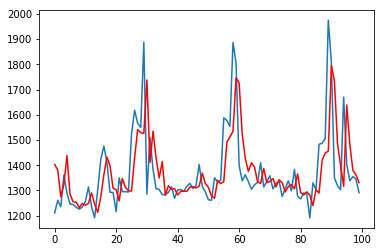

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#def parser(x):
#return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('bajri1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()

Test RMSE: 134.457


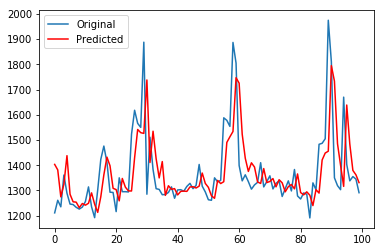

In [7]:
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
pyplot.plot(test[:100], label="Original")
pyplot.plot(predictions[:100], label= "Predicted" ,color='red')
pyplot.legend()
pyplot.show()